# Time Series Clustering Experiments

In this notebook we will show how to run a simple time series clustering experiment using the `tsml-eval` package. Time series clustering is the task of grouping time series into similar groups.

<img src="./images/TSCL.png" width="600" alt="time series clustering" style="margin:20px 20px">

In [1]:
import numpy as np
import pandas as pd
from aeon.benchmarking.metrics.clustering import clustering_accuracy_score
from aeon.benchmarking.results_loaders import get_estimator_results
from aeon.datasets import load_classification
from aeon.visualisation import plot_critical_difference
from sklearn import preprocessing
from tsml.datasets import load_minimal_chinatown
from tsml.dummy import DummyClusterer

from tsml_eval.evaluation.storage import load_clusterer_results
from tsml_eval.experiments import (
    experiments,
    get_clusterer_by_name,
    run_clustering_experiment,
)

In [2]:
X, y = load_minimal_chinatown()

In [3]:
# set_clusterer can be used to find various clusterers by string, but
# any aeon, tsml or sklearn clusterer can be used in the experiments function
clusterer = get_clusterer_by_name("DummyClusterer")

# record memory usage every 0.1 seconds, just here for notebook speed
# does not need to be changed for usage
experiments.MEMRECORD_INTERVAL = 0.1

run_clustering_experiment(
    X,
    y,
    clusterer,
    "./generated_results/",
    dataset_name="Chinatown",
    resample_id=0,
)

A function is also available to load the dataset as well as run an experiment, see `load_and_run_clustering_experiment` in `tsml_eval.experiments`.

Both experiment functions will output a results file in the `{results_dir}/{clusterer_name}/Predictions/{dataset_name}/` directory. These files can be loaded individually, or used as a collection in the `evaluation` module. See the [evaluation](evaluation.ipynb) notebook for more details.

In [4]:
clr = load_clusterer_results(
    "./generated_results/DummyClusterer/Predictions/Chinatown/trainResample0.csv"
)
print(clr.predictions)
print(clr.clustering_accuracy)
print(clr.rand_index)
print(clr.mutual_information)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.5
0.48717948717948717
0.0


A function is also available to load the dataset as well as run an experiment, see `load_and_run_clustering_experiment` in `tsml_eval.experiments`.

A common use-case is wanting to compare a new algorithm against provided benchmark results. The tsml group stores their publication results and provides an `aeon` function to load them. An example of this is shown below for clustering.

In [5]:
clu = DummyClusterer()
datasets = ["ArrowHead", "GunPoint", "ItalyPowerDemand", "Chinatown", "BeetleFly"]

# find accuracy for each of our datasets on our estimator
results = {}
for d in datasets:
    X, y = load_classification(d)
    y = preprocessing.LabelEncoder().fit_transform(y)
    clu.fit(X)
    y_pred = clu.predict(X)
    results[d] = clustering_accuracy_score(y, y_pred)

results

{'ArrowHead': 0.38388625592417064,
 'GunPoint': 0.5,
 'ItalyPowerDemand': 0.5009124087591241,
 'Chinatown': 0.7134986225895317,
 'BeetleFly': 0.5}

In [6]:
benchmarks = ["kmeans-dtw", "kmedoids-dtw", "kmedoids-msm"]
res = get_estimator_results(
    datasets=datasets,
    estimators=benchmarks,
    task="clustering",
    measure="clacc",
)
res

{'kmeans-dtw': {'ArrowHead': 0.5257142857142857,
  'GunPoint': 0.5133333333333333,
  'ItalyPowerDemand': 0.5014577259475219,
  'Chinatown': 0.6880466472303207,
  'BeetleFly': 0.5},
 'kmedoids-dtw': {'ArrowHead': 0.52,
  'GunPoint': 0.5133333333333333,
  'ItalyPowerDemand': 0.5335276967930029,
  'Chinatown': 0.6822157434402333,
  'BeetleFly': 0.6},
 'kmedoids-msm': {'ArrowHead': 0.5314285714285715,
  'GunPoint': 0.52,
  'ItalyPowerDemand': 0.5189504373177842,
  'Chinatown': 0.6909620991253644,
  'BeetleFly': 0.85}}

In [7]:
res["Dummy"] = results
table = pd.DataFrame(res)
table

,kmeans-dtw,kmedoids-dtw,kmedoids-msm,Dummy
ArrowHead,0.525714,0.520000,0.531429,0.383886
GunPoint,0.513333,0.513333,0.520000,0.500000
ItalyPowerDemand,0.501458,0.533528,0.518950,0.500912
Chinatown,0.688047,0.682216,0.690962,0.713499
BeetleFly,0.500000,0.600000,0.850000,0.500000


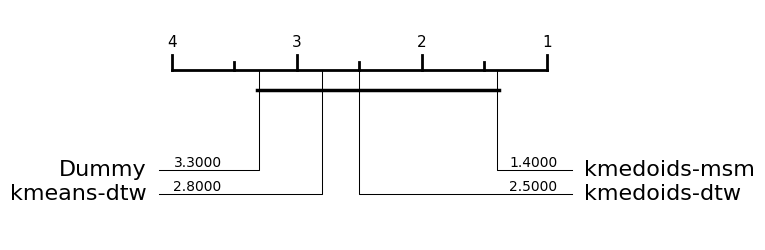

In [8]:
plt, _ = plot_critical_difference(np.array(table), list(table.columns))
plt.show()